# <center> MA323 Computational Methods in Financial Mathematics</center>
# <center>Assessed Coursework</center> 

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Problem 1

### Part (a)

The aim in this question is to numerically approximate $ I_1 = \int_0^2 g(x) dx $  where  $g(x) = \dfrac{1}{1+x^3}$, such that the approximation error is bounded by $\dfrac{1}{1000}$.

We refer to section 1.1 in Chapter 1 of the lecture notes, and following a similar approach, we approximate the function $g$ by a polynomial of degree 1, denoted by $P_1$, which goes through the points $(0 , g(0)) = (0,1)$ 
and $(2, g(2)) = \left(2, \dfrac{1}{9}\right)$. 

Hence, 
$$ P_1(x) = \frac{g(b)- g(a)}{b-a}x + \frac{b g(a) - a g(b)}{b-a} = - \frac{4}{9}x + 1,$$
by plugging in the numbers above.

Using our linear approximation $P_1(x)$, we apply the **Trapezoidal rule** on the grid $0=x_0 < x_1 < \ldots < x_n=2$ with $x_i=ih$, $i=0, \ldots, n$, and $h=\dfrac{2-0}{n} = \dfrac{2}{n}$ as follows: 

\begin{align}
\int_0^2 g(x) dx & = \sum_{i=1}^n \int_{x_{i-1}}^{x_i} g(x) dx 
\approx \sum_{i=1}^n h \frac{g(x_{i-1}) + g(x_i)}{2} \quad \left(\textbf{*}\right) \\
&= \frac{2-0}{n} \left( \frac{g(0) + g(2)}{2} + \sum_{i=1}^{n-1} g \left(0 + \frac{i(2-0)}{n} \right) \right) 
= \frac{2}{n} \left( \frac{5}{9} + \sum_{i=1}^{n-1} g \left( \frac{2i}{n} \right) \right) = T(h).   
\end{align}

Since all three of $ g(x), \space g'(x) =  \dfrac{-3x^2}{(1+x^3)^2} \space \text{and} \space g''(x) = \dfrac {6x (2x^3-1)}{(1+x^3)^3} $ are continuous on $[0,2]$, we have that $g \in C^2[0, 2]$, and by results proved in the lectures, we know that the 
total error of our approximation is given by 

\begin{align}\label{Trap_Totalerror}
T(h) - \int_0^2 g(x) dx = \frac{h^2(2-0)}{12} g''(\xi) = \frac{h^2}{6} g''(\xi)
\end{align}
for some $\xi \in (0, 2)$. 

Moreover, by differentiating $g''(x)$, setting it to zero, and solving for its two stationary points, we can easily see that $x = 1.1535$ is the unique maximizer of $g''(x)$ over the range $[0,2]$. Thus, $g''(\xi) \leq g''(1.1535) = 0.8795 \quad \forall \xi \in [0,2].$

As a result, we conclude that an upper bound for the approximation error is given by 

$$ \frac{h^2}{6} \times 0.8795 = \frac{2 \times 0.8795}{3n^2} \approx \frac{0.5863}{n^2} $$
using $ h=\dfrac{2}{n}$.

Finally, to guarantee an error of at most $\dfrac{1}{1000}$, we choose $n \in \mathbf{N}$ such that $ \dfrac{0.5863}{n^2} \leq \dfrac{1}{1000}$. Hence, we require $n \geq 24.21$, and therefore set $n \geq 25$ to achieve an accuracy of this level.

Using the Trapezoidal rule with a partition of $[0,2]$ consisting of at least 25 sub-intervals of the same length is guaranteed to yield an approximation for $I_1$ with an error of no more than $\dfrac {1}{1000}.$ 

Note that the exact value of $ I_1 \space \text{is} \space \dfrac{\ln \left(3\right)}{6}+\dfrac{{\pi}}{2\sqrt{3}}.$

Below we provide a graphical illustration of how the Trapezoidal rule works using our function $g(x) = \dfrac{1}{1+x^3}$.

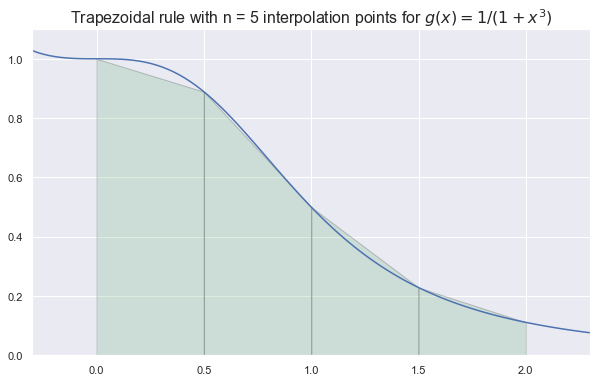

In [31]:
x = np.linspace(-0.3, 2.3, 100)
g = lambda x: 1 / (1 + x**3)   
y = g(x)

a = 0; b = 2;

number_of_interpols = 5

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(x, y)
ax.set_xlim([-0.3, 2.3]); ax.set_ylim([0, 1.1]);


# x and y values for the trapezoid rule
x_trapez = np.linspace(a, b, number_of_interpols)
y_trapez = g(x_trapez)

for i in range(number_of_interpols - 1):
    xs = [x_trapez[i], x_trapez[i+1]]
    ys = [g(x_trapez[i]), g(x_trapez[i+1])]
    ax.fill_between(xs, ys, edgecolor = 'black', facecolor = 'g', alpha = 0.2)

plt.title('Trapezoidal rule with n = {} interpolation points for $g(x) = 1 / (1+x^3)$'.format(number_of_interpols) 
          , fontsize = 16);

We now define a function to calculate the value of $I_1$ using the formula described above.

In [29]:
def trapezoidal(a, b, function, n=100):
    
    """
    Parameters
    ----------
    a: Left end-point of the interval.
    b: Right end-point of the interval.
    function: The function for which we approximate its integral over [a,b].
    n: Number of points to be used for the partitioning of [a,b].
    
    Returns
    -------
    I: Integral approximation using the Trapezoidal rule.
    
    """
    x = np.linspace(a, b, n + 1) # n+1 points to create n subintervals
    y = function(x)
    y_right = y[1:] 
    y_left = y[: -1] 
    h = (b - a) / n
    I = (h / 2) * np.sum(y_right + y_left) # Using the summation formula marked with (*)
    
    return I

In [32]:
exact_value = ( np.log(3) / 6 ) + ( np.pi / (2 * 3**0.5)) # Exact value of I1
approx = trapezoidal(a = 0, b = 2, function = g, n = 25 ) # Approximation of I1 using n=25

In [33]:
print(f'Exact value of the integral: {exact_value:.8f}')
print(f'Approximation found by the Trapezoidal rule: {approx:.8f}')
print(f'Approximation error using n=25: {approx - exact_value :.8f}') # This is less than 1/1000, in absolute value as well 

Exact value of the integral: 1.09000173
Approximation found by the Trapezoidal rule: 1.08992240
Approximation error using n=25: -0.00007933


### Part (b)

We firstly note that $$ I_2 = \int_0^\infty \frac{1}{\sqrt{x}} \space e^{-3x} dx = \int_0^\infty \frac{1}{3 \sqrt{x}} \space 3e^{-3x} dx 
= \int_0^\infty \frac{f(x)}{3 \sqrt{x}} \space dx = \int_{- \infty}^{\infty} \frac{f(x)}{3 \sqrt{x}} \space dx = \mathbb{E} \left[ \frac{1}{3\sqrt{X}} \right] , $$

where $ X \sim Exponential(3), $ and has a probability density function (PDF) equal to $ 3e^{-3x} \space \mathbf{1}\{ x \in [0,\infty) \} .$


Let $X_1, \cdots, X_n$ be a sequence of independent and identically distributed (i.i.d.) random variables from the $ Exponential $ distribution with rate parameter $\lambda = 3,$  having the same distribution as the $ Exponential(3) $ random variable $X,$ with $\mathbb{E} |X| < \infty$. Using the Strong Law of Large Numbers, and by referring to section 1.2 in Chapter 1 of the lecture notes, a Monte Carlo estimator for $ I_2 = \mathbb{E} \left[ \dfrac{1}{3\sqrt{X}} \right] $ is given by

\begin{align}
\hat{I}_n = \frac{1}{n} \sum _{i=1}^n \dfrac{1}{3\sqrt{X_i}} ,
\end{align}
where $X_i$ are as specified above.

The mean of $\hat{I}_n$ is

\begin{align*}
\mathbb{E}  \left[ \hat{I}_n \right] = \frac{1}{n} \sum _{i=1}^n \mathbb{E} \left[ \frac{1}{3\sqrt{X_i}} \right]
= \mathbb{E} \left[ \frac{1}{3\sqrt{X}} \right] = I_2 ,
\end{align*}

and so our estimator is unbiased.

In addition, the variance of the above Monte Carlo estimator is given by

\begin{align}
{\rm Var} \left( \hat{I}_n \right) = \frac{1}{n^2} \sum _{i=1}^n {\rm Var} 
\left( \dfrac{1}{3\sqrt{X_i}} \right) =  \frac{1}{n} {\rm Var}  \left( \dfrac{1}{3\sqrt{X}} \right) .
\end{align}

Note: Since we were not explicitly asked to obtain the random sample of the required random variables using a specific method, we sample directly from the Exponential distribution using NumPy.

In [2]:
rng = np.random.default_rng(seed = 981729821)
nsamples = 100_000_0 # sample size
# Simulating IID Exponential(3) random variables
exp_sample = rng.exponential(scale = 1/3 , size = nsamples)
mc_samples = 1 / (3 * np.sqrt(exp_sample))
MC_estimate = mc_samples.mean() # Monte-Carlo estimate of I2
MC_std = mc_samples.std() / np.sqrt(nsamples) # St. Dev of MC estimator

In [3]:
print(f'The standard Monte Carlo estimate for I2 is: {MC_estimate:.5f}, and has a standard deviation of {MC_std:.5f}')

The standard Monte Carlo estimate for  I2 is: 1.02354 and has a standard deviation of 0.00187


In the graph below, we plot the standard Monte Carlo estimates against the number of samples. Note that the x-axis values start at 50 000, since we include a burn-in sample of 50 000 so that we analyse the more accurate Monte Carlo estimates of $I_2$.

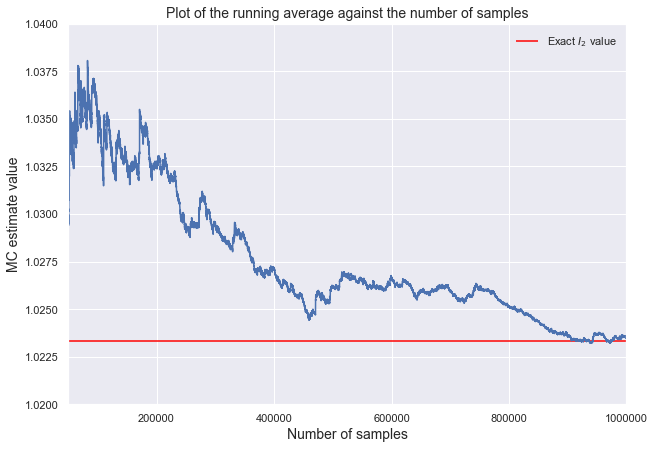

In [4]:
I2_exact = np.sqrt(np.pi / 3) # exact value of the integral I2

running_average = np.cumsum(mc_samples) / np.arange(1, nsamples + 1) # Rolling average 
burn_in_samples = 50_000 # Probably better to discard the first 50 000 less accurate estimates

_ , ax = plt.subplots(figsize = (10,7))
ax.plot(np.arange(burn_in_samples, nsamples + 1) , running_average[burn_in_samples - 1 : ])
ax.hlines(I2_exact, xmin = burn_in_samples, xmax = nsamples, color='red' , label = 'Exact $I_2$ value')
ax.set_title('Plot of the running average against the number of samples' , fontsize = 14);
plt.xlabel('Number of samples' , fontsize = 14)
plt.xlim([burn_in_samples , nsamples]);
plt.ylim([1.02 , 1.04]);
plt.ylabel('MC estimate value', fontsize = 14)
ax.ticklabel_format(useOffset=False, style='plain')
ax.legend(frameon = False);

We clearly see that for large sample sizes, the Monte Carlo estimates converge to the exact value of $I_2$.

Moving on to the variance reduction part of this question, we now describe and implement a Control Variate estimator for $I_2$, and discuss its variance reduction efectiveness in this example. 

Let $X \sim Exp(3)$ and $Y = f(X) = \dfrac{1}{3 \sqrt{X}},$ where $f(x) = \dfrac{1}{3 \sqrt{x}}$. Since $X \sim Exp(3)$, by using standard results about the Exponential distribution we have that $\mathbb{E} [X] = \dfrac{1}{3}$ and $\rm{Var} (X) = \dfrac{1}{9},$ so that our random variables have finite mean and variance.

Moreover, let $(X_i)$ be an an i.i.d. sequence of random variables with the same distribution as $X$, and define $Y_i =f(X_i) = \dfrac{1}{3 \sqrt{X_i}}$. 



Given the sequence $(X_i,Y_i)$ of i.i.d. random vectors from the joint distribution of $(X,Y)$, we define

\begin{align*}
 Y_i (b) = Y_i - b \left( X_i - \mathbb{E} [X] \right) = Y_i - b \left( X_i - \frac{1}{3} \right), \quad \text{for } i
=1, 2, \ldots , n
\end{align*}

where $b \in \mathbb{R}$ is a constant.


The control variate estimator with parameter $b$ of $I_2$ is defined by

\begin{align}
\hat{I}^{cv}_n (b) := \frac{1}{n} \sum _{i=1}^n \left( Y_i - b \left( X_i - \mathbb{E}[X] \right) \right) = \frac{1}{n} \sum _{i=1}^n \left( \dfrac{1}{3 \sqrt{X_i}} - b \left( X_i - \dfrac{1}{3} \right) \right) = \frac{1}{n} \sum _{i=1}^n Y_i (b) .
\end{align}

The mean of our control variate estimator is

\begin{align}
\mathbb{E} \left[ \hat{I}^{cv}_n (b) \right] = \frac{1}{n} \sum _{i=1}^n
\mathbb{E} \left[ Y_i (b) \right] = \frac{1}{n} \sum _{i=1}^n
\mathbb{E} \left[ Y_i \right] = \mathbb{E} [Y] = \mathbb{E} \left[ \frac{1}{3\sqrt{X}} \right] = I_2 ,
\end{align}

so our estimator is unbiased.

As seen in lectures, the value $b^*$ of the parameter $b$ that minimizes the variance of $\hat{I}^{cv}_n (b)$ is given by

\begin{align}
b^* = \frac{{\rm Cov} (X,Y)}{{\rm Var} (X)} 
\end{align}

However, in this case, since we don't know the value of ${\rm Cov} (X,Y)$, in our calculations we replace $b^*$ by its unbiased estimator

\begin{align}
 \hat{b}^* = \dfrac{\sum _{i=1}^n \left( X_i - \overline{X}_n \right)
\left( Y_i - \overline{Y}_n \right)} {\sum _{i=1}^n \left( X_i - \overline{X}_n \right)^2} ,
\end{align}

where $\overline{X}_n$ and $\overline{Y}_n$ denote the sample mean of the $X_i$ and $Y_i$ random samples respectively.


Therefore, our control variates estimator is given by:

$$\hat{I}^{cv}_n \left( \hat{b}^* \right) = \frac{1}{n} \sum _{i=1}^n \left( \dfrac{1}{3 \sqrt{X_i}} -  \hat{b}^* \left( X_i - \dfrac{1}{3} \right) \right) = \frac{1}{n} \sum _{i=1}^n Y_i \left( \hat{b}^* \right) . $$

In [37]:
# Variance reduction using Control variates
Y_i = 1 / (3 * np.sqrt(exp_sample))
b_star = np.cov(exp_sample , Y_i)[0,1] / np.var(exp_sample) # unbiased estimate for b*
control_variates_sample = Y_i - b_star * (exp_sample - (1/3)) # Our Y_i(b*) sample
MC_estimator_CV = control_variates_sample.mean()
MC_estimator_CV_std = control_variates_sample.std() / np.sqrt(nsamples) # Standard deviation of control variate estimator

In [38]:
print('Exact value of integral:              {:.6f}'.format(I2_exact))
print('Standard MC estimate (b = 0):         {:.6f}; standard deviation: {:.6f}'.format(
    MC_estimate, MC_std))
print('Control variate estimate with b = b*: {:.6f}; standard deviation: {:.6f}'.format(
    MC_estimator_CV, MC_estimator_CV_std))
print('\n')
print('Empirical variance reduction : {:.6f}%'.format(100 * ( 1 - ( MC_estimator_CV_std**2 / MC_std**2 ) ) ) ) 

Exact value of integral:              1.023327
Standard MC estimate (b = 0):         1.023539; standard deviation: 0.001871
Control variate estimate with b = b*: 1.023484; standard deviation: 0.001800


Empirical variance reduction : 7.479747%


In [39]:
print(f'Correlation between X_i s and Y_i s is {np.corrcoef(exp_sample, Y_i)[0,1] : .4f}')

Correlation between X_i s and Y_i s is -0.2735


To reason on the effectiveness of this variance reduction technique, we refer to section 4.1 of Chapter 4 in the lecture notes and use the following result

\begin{align}
\frac{{\rm Var} (\hat{I}^{cv}_n (\hat{b}^*))} {{\rm Var}(\hat{I}_n)} = 1 -
\frac{{\rm Cov} (X,Y)^2}{{\rm Var} (X) {\rm Var}(Y)} = 1 - \rho_{XY}^2, 
\end{align}

where $\rho_{XY}$ is the correlation between the $X$ and $Y$ samples.

Based on the above mathematical relationship for the ratio of the variance of the two estimators, and given that $\rho_{XY} = - 0.2735$ , as expected the control variate technique is not very effective in this example. Judging also from the plot below, we conclude that the performance of the control variate estimator is quite similar to that of the standard Monte Carlo estimator in terms of the rate of convergence towards the exact value of $I_2$. 

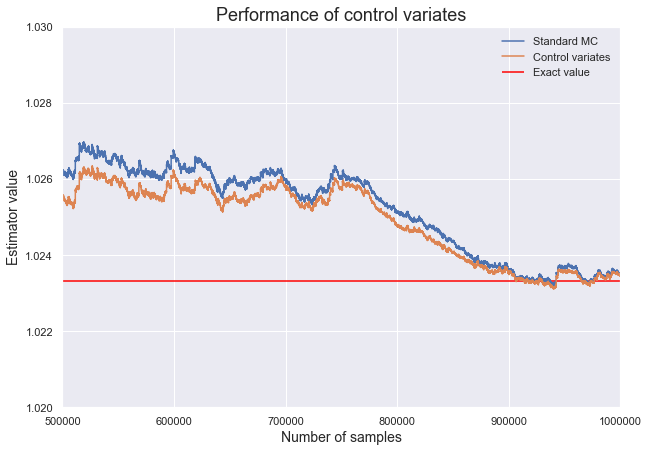

In [40]:
start_plot = nsamples // 2

_ , ax = plt.subplots(figsize = (10,7))

xx = np.arange(start_plot + 1, nsamples + 1)
ax.plot(xx, np.cumsum(mc_samples)[start_plot:] / xx, label = 'Standard MC')
ax.plot(xx, np.cumsum(control_variates_sample)[start_plot:] / xx, label = 'Control variates')
ax.hlines(I2_exact, xmin = start_plot, xmax = nsamples, color='red', label ='Exact value')
plt.ylim([1.02 , 1.03]);
plt.xlim([start_plot , nsamples]);
ax.set_ylabel('Estimator value', fontsize = 14)
ax.set_xlabel('Number of samples', fontsize = 14);
ax.set_title('Performance of control variates', fontsize = 18);
ax.ticklabel_format(useOffset=False, style='plain')
ax.legend(frameon=False);

## Problem 2

### Part (a)

In this question, we need to find $\alpha \in \mathbb{R}$ such that the function $f$ given by

\begin{align}
f(x) = \left \{ \begin{array}{cc}
\alpha(1+x)^2, & \textrm{ if } x \in (0, 2), \\
0, & \textrm{ if } x \notin (0,2),
\end{array}
\right . 
\end{align}

is a valid probability density function (PDF).

We begin by discussing the non-negativity property of a probability density function. In this case, we note that $(1+x)^2 \geq 0 \textrm{ for all } x \in  (0,2)$ and therefore if we set $\alpha \geq 0 , \space f(x) \geq 0 \space \textrm{ for all } x \in  \mathbb{R}.$ After satisfying the first property, we also need $1 = \int_{-\infty}^{\infty}f(x) \space dx = \int_0^2 a(1+x)^2 \space dx $, for $f$ to be a valid probability density function. 

Therefore, we solve for $\alpha$ in the above equation, and find that $\alpha = \dfrac{1}{\int_0^2 (1+x)^2 \space dx} = \dfrac{3}{26}.$ 

Thus we get the following PDF for $f$:

$$
	f(x) = \left \{ \begin{array}{cc}
\frac{3}{26}(1+x)^2, & \textrm{ if } x \in (0, 2), \\
0, & \textrm{ if } x \notin (0,2)
\end{array}
\right . 
$$

### Part (b)

In this part of the question, we describe how to obtain a random sample from the distribution of $f$ using von Neumann's acceptance-rejection algorithm.

Let $X \sim \mathcal{U}(0,2).$ Then, its probability density function is given by $ g(x) = \dfrac{1}{2} \mathbf{1}\{ x \in (0,2) \}. $ To apply the von Neumann acceptance-rejection algorithm, we need to find $c \in \mathbb{R},$ such that $f(x) \leq c g(x) \space \forall x \in \mathbb{R}.$ We notice that $f(x)$ is a strictly increasing function over the range $[0,2]$ and hence $ 0 \leq f(x) \leq f(2) \space \textrm{for all} \space x \in \mathbb{R}.$ Motivated by this result, we pick $c = 2f(2) = \dfrac{27}{13}$ and observe that the inequality $f(x) \leq c g(x)$ now becomes $f(x) \leq 2f(2) \times \dfrac{1}{2} = f(2),$ which we have shown that it holds for all $x \in \mathbb{R}$.

We now describe in detail how we can obtain a random sample from the distribution specified by $f$ in part (a) by sampling from the distribution of $g$ using von Neumann’s acceptance-rejection algorithm: 

 1. Generate $X \sim \mathcal{U}(0,2)$ from the PDF $g$. 
 2. Generate $U \sim\mathcal{U}(0, 1)$ (independent of $X$).
 3. If  $U \leq \dfrac{f(X)}{c g(X)} = \dfrac{f(X)}{f(2)}$, then accept $X$ and return it. Otherwise, go back to step 1.
 
From results proved in section 2.5 in Chapter 2 of the lectures, we know that the probability that we accept an $X$ sampled from $g$ is 
$\mathbb{P} \left[ U \leq \frac{f(X)}{c g(X)} \right] = \dfrac{1}{c}$. Thus, for this particular choice of $g,$ the best possible proportion of numbers that the algorithm accepts is $\dfrac{1}{c} = \dfrac{1}{2f(2)} \approx 48.1 \%.$  

Below we implement von Neumann’s acceptance-rejection algorithm to obtain 10 000 samples from $f$.

In [2]:
rng = np.random.default_rng(seed = 22371)
c = 2 * (3/26 * (1+2)**2) # This is 2*f(2) as specified above 
f = lambda x: 3/26 * (1+x)**2 # f(x) as in the question

nsamples = 10_000
samples = [] # we create a list to store the samples
counter = 0 # set a counter for the total number of iterations needed to obtain our sample

for _ in range(nsamples):
    candidate = rng.random() * 2  # Sample X from U(0,2)
    u = rng.random()   # Sample U from U(0,1)
    
    while (u > f(candidate) / (c * 0.5)): # While our acceptance criterion is not met, keep sampling
        u = rng.random()
        candidate = rng.random() * 2    
        counter += 1
        
    samples.append(candidate)
    
    counter += 1

print('We used {} iterations for {} samples. The acceptance rate is {:.4}% '.format(counter, nsamples, 100 * nsamples/counter))

We used 20837 iterations for 10000 samples. The acceptance rate is 47.99% 


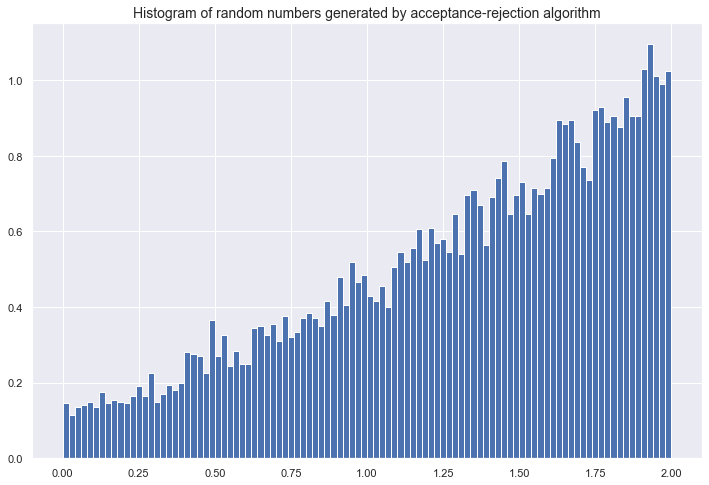

In [3]:
fig , ax = plt.subplots(figsize = (12, 8))
ax.hist(samples, bins = 100, density = True);
ax.set_title('Histogram of random numbers generated by acceptance-rejection algorithm' , fontsize = 14);

### Part (c)

In this part we sample from $f$ using the inverse transform method. Firstly, we need to find the Cumulative distribution function of $f$, $F(x)$. 

$$ F(x) = \int_{- \infty}^{x} \frac{3}{26} (1+t)^2 \space dt = \int_{0}^{x} \frac{3}{26} (1+t)^2 \space dt = \frac{3}{26} \left( \frac{x^3}{3} + x^2 + x \right) = \frac{1}{26} \left( x^3 + 3x^2 + 3x \right) = \frac{(x+1)^3 - 1}{26}, \space \textrm{for} \space x \in (0,2) . $$

We therefore have that:

\begin{align}
F(x) &= \left \{ \begin{array}{cc}
0 & \textrm{if} \space x \leq 0 \\
\dfrac{(x+1)^3 - 1}{26} & \textrm{if} \space x \in (0,2) \\
1 & \textrm{if} \space x \geq 2 \\
\end{array}
\right .
\end{align}

Then, we can see that $F(x)$ is strictly increasing and continuous on $[0,2]$, and hence is a bijective function. As a result, we know that its inverse exists and is well-defined. We proceed and find this inverse to be
$$ F^{-1}(u) = \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 3]{26u + 1} \space - 1, \quad \textrm{for} \space u \in (0,1)$$

By the 'Universality of the Uniform' theorem in section 2.4.3 in Chapter 2 of the lecture notes, we are guaranteed that given $U \sim \mathcal{U}(0,1)$, the random number $F^{-1}(U)$ will have a cumulative distribution function $F$ as specified above.

Having set the scene, we implement this technique below to obtain 10 000 samples from $f$.

In [4]:
rng = np.random.default_rng(seed = 22372)
F_inverse = lambda x: (26*x + 1)**(1/3) - 1  # Inverse of F(x)
uniform_sample = rng.random(size = 10_000) # Generate 10000 U(0,1)
inv_transf_sample = F_inverse(uniform_sample) # Apply F^-1 to the Uniform sample

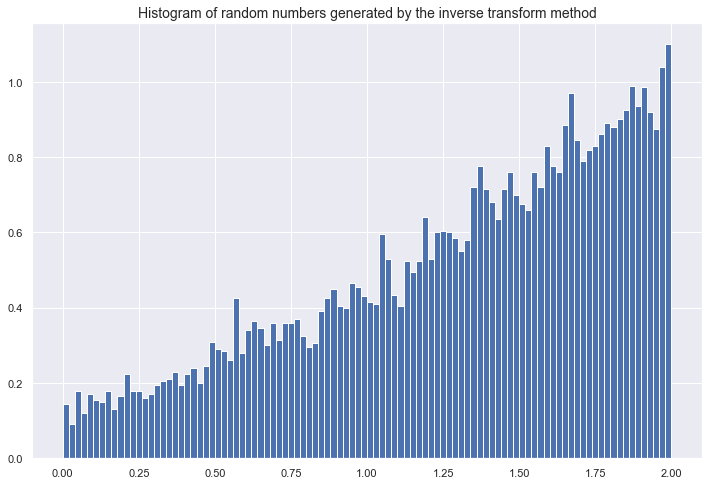

In [5]:
fig , ax = plt.subplots(figsize = (12, 8))
ax.hist(inv_transf_sample, bins = 100, density = True);
ax.set_title('Histogram of random numbers generated by the inverse transform method' , fontsize = 14);

By comparing the histograms produced by the two methods in (b) and (c), we can see that both of them produce a sample from the required distribution $f$. However, usign the inverse transform method to obtain the sample is less computationally expensive since all of the random numbers generated in this way are accepted with probability $1$, in contrast to the acceptance-rejection method which only accepts a generated number with probability of around $0.481$. Moreover, we also highlight that inverting the CDF of $f$ in this example is an easy task and this renders the inverse transform method a very suitable choice. Concluding, based on the aforementioned arguments, the most suitable method for generating a sample of random numbers from $f$ in this case is the inverse transform method, due to its computational efficiency and ease of implementation.

## Problem 3

### Part (a)

Let $V_0$ denote the time-0 price of the option with random maturity payoff $H := K 1\{ S_T \in (a,b) \}, $ as specified in the question. Since we are in a standard Black-Scholes setting, the evolution of the stock price follows a geometric brownian motion with parameters as specified in the question. Another important property of the stock price in the Black-Scholes setting is its Lognormal distribution, which we make use of below. With this in mind, and using the fact that the price of an option is given by the risk-neutral expectation of its discounted payoff, the analytical formula for the time-0 option price is given by 

\begin{align} 
	V_0 &= \mathbb{E}^{\mathbb{Q}}\left[ e^{-rT} H(S_T) \right]  \\
    &= \mathbb{E}^{\mathbb{Q}}\left[ e^{-rT} K \space 1\{S_T \in (a,b)\} \right] \\
    &= K e^{-rT} \mathbb{E}^{\mathbb{Q}}\left[ 1\{S_T \in (a,b)\} \right] \\
    &= K e^{-rT} \mathbb{E}^{\mathbb{Q}}\left[ 1\{log(S_T) \in (log(a),log(b))\} \right] \quad \textrm{(since the logarithmic transformation is monotonic)} \\
    &= K e^{-rT} \mathbb{Q}\left[ \space log(a) < log(S_T) < log(b) \space \right] \\
    &= K e^{-rT} \mathbb{Q} \left[\dfrac{log(a) - log(S_0) - (r - \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} < Z < \dfrac{log(b) - log(S_0) - (r - \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} \space \right] \quad \textrm{since} \space log(S_T) \overset{\mathbb{Q}}{\sim} \mathcal{N}(\space log(S_0) + (r - \frac{\sigma^2}{2})T, \space \sigma^2 T \space)  \\
    &= K e^{-rT} \mathbb{Q} \left[\dfrac{log\left(\frac{a}{S_0}\right) - (r - \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} < Z < \dfrac{log\left(\frac{b}{S_0}\right) - (r - \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} \space \right]  \\
    &= K e^{-rT} \left[ \phi\left(\dfrac{log\left(\frac{b}{S_0}\right) - (r - \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} \right)  - \phi\left(\dfrac{log\left(\frac{a}{S_0}\right) - (r - \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} \right)\right] \quad \textrm{where} \space \phi \space \textrm{denotes the Standard Normal CDF}
\end{align}

### Part (b.1)

As in the Black-Scholes setting we know the exact distribution of the stock price at maturity, it is much more computationally efficient to sample directly from this distribution rather than simulate the whole price path to only select the last (maturity) price. This can also be done because this option is path independent and therefore its payoff is only determined by the stock price at maturity and not any other previous prices. We refer to section 3.5.2 in Chapter 3 of the lecture notes, and use a similar approach for finding the Monte Carlo estimator of the time-0 price $V_0$ below.

Using a Monte Carlo approach, we approximate the probability (under the risk-neutral measure) that the option ends up in-the-money at maturity as follows:

$$  \mathbb{Q}\left[ \space log(a) < log(S_T) < log(b) \space \right] = \int_{log(a)}^{log(b)} f(x) \space dx = \int_{- \infty}^{+ \infty} 1\{log(a) < x < log(b)\} \space f(x) \space dx = \mathbb{E}^{\mathbb{Q}}\left[ 1\{ log(a) < X < log(b) \} \right]$$ where 
$$ X \sim \mathcal{N}(\space log(S_0) + (r - \frac{\sigma^2}{2})T, \space \sigma^2 T \space) . $$

The Monte Carlo estimator for the above probability is given by

$$ I^{MC}_n := \dfrac{1}{n} \sum_{i=1}^{n} 1\{log(a) < X_i < log(b)\} \quad \textrm{where} \space X_i \overset{IID}{\sim} \mathcal{N}(\space log(S_0) + (r - \frac{\sigma^2}{2})T, \space \sigma^2 T \space) $$

Finally, using the fact that $ K e^{-rT} $ is just a constant, we can scale our estimator for the probability that the option ends up in-the-money at maturity, $I^{MC}_n$, to obtain the Monte Carlo estimator for the time-0 price of the option, $V_0$, which is given by $ V^{MC}_0 := K e^{-rT} \space I^{MC}_n .$

### Part (b.2)

We now discuss how we can generate the random variables required for the Monte Carlo estimator $V^{MC}_0$ described above. 

We refer to section 2.6.3 in Chapter 2 of the lecture notes, and describe how we can use the Box-Muller method to generate independent standard normal random variables.

The Box-Muller algorithm is defined as follows:
1. Generate independent random variables $U_1, U_2 \sim\mathcal{U}(0,1)$;
2. Set $R = -2\log(U_1)$; 
3. Set $\theta = 2 \pi U_2$;
4. Set $Z_1 = \sqrt{R} \cos (\theta)$; 
5. Set $Z_2 = \sqrt{R} \sin (\theta)$; 
6. Return the independent standard normal random variables $Z_1$ and $Z_2$.
7. Repeat steps 1-6 until you obtain a random sample of the desired size.

After obtaining a random sample of independent standard normals using the Box-Muller algorithm, we apply the transformation $X_i := \left( \sigma \sqrt{T} Z_i \right) + log(S_0) + (r - \dfrac{\sigma^2}{2})T $ to each $Z_i$ generated above, in order to obtain a random sample from the $ \mathcal{N}(\space log(S_0) + (r - \frac{\sigma^2}{2})T, \space \sigma^2 T \space) $ distribution, as required for our Monte Carlo estimator.

### Part (b.3)

The variance of the Monte Carlo estimator for $ \mathbb{Q}\left[ \space log(a) < log(S_T) < log(b) \space \right], $ $ I^{MC}_n, $ is given by

$$ {\rm Var} \left( I^{MC}_n \right) = {\rm Var} \left( \dfrac{1}{n} \sum_{i=1}^{n} 1\{log(a) < X_i < log(b)\} \right) = \frac{1}{n^2} \sum _{i=1}^n {\rm Var} 
( \space 1\{log(a) < X_i < log(b)\} \space) =  \frac{1}{n} {\rm Var}  ( \space 1\{log(a) < X < log(b)\} \space)$$ 

where the second and third equalities come from the fact that each $X_i$ is independently and identically distributed, with the same distribution as $X$, where $ X \sim \mathcal{N}(\space log(S_0) + (r - \frac{\sigma^2}{2})T, \space \sigma^2 T \space). $


With $X$ as specified above, we note that 

\begin{align*}
{\rm Var}  ( \space 1\{log(a) < X < log(b)\} \space) &= \mathbb{E}^{\mathbb{Q}}\left[ \space 1\{log(a) < X < log(b)\}^2 \space \right] - ( \space \mathbb{E}^{\mathbb{Q}}\left[ \space 1\{log(a) < X < log(b)\} \space \right] \space)^2 \\
&= \mathbb{E}^{\mathbb{Q}}\left[ \space 1\{log(a) < X < log(b)\} \space \right] - ( \space \mathbb{E}^{\mathbb{Q}}\left[ \space 1\{log(a) < X < log(b)\} \space \right] \space)^2 \\
&= \mathbb{Q}\left[ \space log(a) < X < log(b) \space \right] - \mathbb{Q}\left[ \space log(a) < X < log(b) \space \right]^2 \\ &= \mathbb{Q}\left[ \space log(a) < X < log(b) \space \right] \left( \space 1 -  \mathbb{Q}\left[ \space log(a) < X < log(b) \space \right] \space \right)
\end{align*}

Thus, the variance of $ I^{MC}_n $ is given by

$$ \dfrac{\mathbb{Q}\left[ \space log(a) < X < log(b) \space \right] \left( 1 -  \mathbb{Q}\left[ \space log(a) < X < log(b) \space \right] \right)}{n} $$

Finally, since our Monte Carlo estimator for the time-0 price of the option $V_0$ is given by $ K e^{-rT} I^{MC}_n ,$ its variance is given by 

\begin{align*}
{\rm Var} \left( V^{MC}_0 \right) 
= {\rm Var} \left( K e^{-rT} I^{MC}_n \right) 
= K^2 e^{-2rT} {\rm Var} \left( I^{MC}_n \right) 
= K^2 e^{-2rT} \space \dfrac{\mathbb{Q}\left[ \space log(a) < X < log(b) \space \right] \left( 1 -  \mathbb{Q}\left[ \space log(a) < X < log(b) \space \right] \right)}{n},
\end{align*}

which we can easily see it decreases asymptotically as the sample size $n$ increases.

### Part (b.4)

Below we describe how we can obtain asymptotic confidence intervals for the time-0 price of the option using our Monte Carlo estimator.

Let $ \space 1\{log(a) < X_1 < log(b)\}, \space 1\{log(a) < X_2 < log(b)\}, \space \dots \space $ be a sequence of independent and identically distributed random variables having finite mean $\mu := \mathbb{Q}\left[ \space log(a) < X < log(b) \space \right] $ and finite variance $\sigma^2 := \mathbb{Q}\left[ \space log(a) < X < log(b) \space \right] \left( 1 -  \mathbb{Q}\left[ \space log(a) < X < log(b) \space \right] \right) > 0 \space $ as specified in previous parts, where $ X_i \overset{IID}{\sim} \mathcal{N}(\space log(S_0) + (r - \frac{\sigma^2}{2})T, \space \sigma^2 T \space). $

Then, by the Central Limit Theorem (CLT) we have 

$$ \lim_{n \to \infty} \mathbb{Q} \left[ \dfrac{\dfrac{1}{n} \sum_{i=1}^n 1\{log(a) < X_i < log(b)\} - \mu}{\sqrt{\dfrac{\sigma^2}{n}}} \leq x \right] = \lim_{n \to \infty} \mathbb{Q} \left[ \dfrac{ I^{MC}_n - \mu}{\dfrac{\sigma}{\sqrt{n}}} \leq x \right] = \Phi(x) = \int_{- \infty}^x \frac{1}{\sqrt{2 \pi}} e^{- \frac{y^2}{2}} dy \quad \forall x \in \mathbb{R}$$

By the CLT, we are guaranteed that for $n$ sufficiently large, $ I^{MC}_n$ is approximately $\mathcal{N}(\mu, \frac{\sigma^2}{n}), $ with $\mu$ and $\sigma^2$ as specified above. 

Moreover, since $ \lim_{n \to \infty} I^{MC}_n = \mathbb{Q}\left[ \space log(a) < X < log(b) \space \right], $ using Slutsky's lemma we can approximate $\sigma \space $ by $ \space \hat{\sigma} := \sqrt{ I^{MC}_n \left( 1 - I^{MC}_n \right)} \space ,$ for $n$ sufficiently large.  

For $\alpha \in (0,1)$ consider the unique number $q_\alpha$ (the so called $\alpha$-*quantile*) such that

\begin{align}
\Phi (q_\alpha) = 1 - \alpha. \quad \textrm{where} \space \Phi \space \textrm{denotes the Standard Normal CDF.}
\end{align}

The CLT then yields that $\mu = \mathbb{Q}\left[ \space log(a) < X < log(b) \space \right] $ belongs to the $100(1 - 2\alpha)$% asymptotic confidence interval

\begin{align*}
\left( I^{MC}_n - q_\alpha \frac{\hat{\sigma}}{\sqrt{n}};\,
I^{MC}_n + q_\alpha \frac{\hat{\sigma}}{\sqrt{n}} \right)
\end{align*}
as $n \rightarrow \infty$.

In particular, 95% and 99% asymptotic confidence intervals for $ \mu = \mathbb{Q}\left[ \space log(a) < X < log(b) \space \right] $ are given by 

$$ ( I^{MC}_n - \Phi^{-1}\left(1 - \frac{0.05}{2} \right) \dfrac{\hat{\sigma}}{\sqrt{n}} \space ; \space I^{MC}_n + \Phi^{-1}\left (1 - \frac{0.05}{2} \right) \dfrac{\hat{\sigma}}{\sqrt{n}} ) \space =  ( I^{MC}_n - \dfrac{1.96 \space \hat{\sigma}}{\sqrt{n}} \space ; \space I^{MC}_n + \dfrac{1.96 \space \hat{\sigma}}{\sqrt{n}} \space ) \\ \textrm{and} \space  ( I^{MC}_n - \Phi^{-1}\left(1 - \frac{0.01}{2} \right) \dfrac{\hat{\sigma}}{\sqrt{n}} \space ; \space I^{MC}_n + \Phi^{-1}\left (1 - \frac{0.01}{2} \right) \dfrac{\hat{\sigma}}{\sqrt{n}} ) \space =  ( I^{MC}_n - \dfrac{2.576 \space \hat{\sigma}}{\sqrt{n}} \space ; \space I^{MC}_n + \dfrac{2.576 \space \hat{\sigma}}{\sqrt{n}} \space ) \space \textrm{respectively.} $$


Finally, we use the fact that for a scaled Normal random variable, a confidence interval can be obtained by scaling the end-points of a confidence interval of the unscaled Normal random variable. Hence, after noting that $\hat{ {\rm Var} } \left( V^{MC}_0 \right) = K^2 e^{-2rT} \space \dfrac{\hat{\sigma}^2}{n},$ we deduce that the respective 95% and 99% asymptotic confidence intervals for the time-0 price of the option, $V_0$, are given by

$$
\left[ Ke^{-rT} \left( I^{MC}_n - \dfrac{1.96 \space \hat{\sigma}}{\sqrt{n}} \space \right) \space ; \space Ke^{-rT} \left( I^{MC}_n + \dfrac{1.96 \space \hat{\sigma}}{\sqrt{n}} \space \right) \right] = \left[ V^{MC}_0 - 1.96 \sqrt{ \hat{ {\rm Var} } \left( V^{MC}_0 \right)} \space  ; \space  V^{MC}_0 + 1.96 \sqrt{ \hat{{\rm Var}} \left( V^{MC}_0 \right)} \right] \\
\textrm{and} \\
\left[ Ke^{-rT} \left( I^{MC}_n - \dfrac{2.576 \space \hat{\sigma}}{\sqrt{n}} \space \right) \space ; \space Ke^{-rT} \left( I^{MC}_n + \dfrac{2.576 \space \hat{\sigma}}{\sqrt{n}} \space \right) \right] = \left[ V^{MC}_0 - 2.576 \sqrt{ \hat{ {\rm Var} } \left( V^{MC}_0 \right)} \space ; \space  V^{MC}_0 + 2.576 \sqrt{ \hat{{\rm Var}} \left( V^{MC}_0 \right)} \right] \space \textrm{respectively.}
$$


### Part (c.1)

In [2]:
def BS_analytical_price(K, r, T, σ, S0, a, b):
    
    """
    Parameters
    ----------
    K: Fixed payoff of the option when it is in-the-money.
    r: The non-negative constant interest rate.
    T: Maturity date.
    σ: Volatility of the stock (must be positive).
    S0: Initial stock price (must be positive).
    a: Lower end-point of the in-the-money interval of the option.
    b: Upper end-point of the in-the-money interval of the option.
    
    Returns
    -------
    Time-0 price of the option calculated by the analytical formula in (a).
    
    """ 
    lower = ( np.log(a / S0) - (r - 0.5 * (σ**2)) * T  ) / (σ * T**0.5) # lower end-point to use in Normal CDF
    upper = ( np.log(b / S0) - (r - 0.5 * (σ**2)) * T  ) / (σ * T**0.5) # upper end-point to use in Normal CDF
    phi_lower = sc.stats.norm.cdf(x = lower , loc = 0, scale = 1) # Standard Normal CDF applied at lower end-point
    phi_upper = sc.stats.norm.cdf(x = upper , loc = 0, scale = 1) # Standard Normal CDF applied at upper end-point
    
    
    return (K * np.exp(-r * T)) * (phi_upper - phi_lower) # time-0 price of the option using part (a) analytical formula

### Part (c.2)

In [3]:
def standard_MC_option_pricing(nsamples, seed, c_level, K, r, T, σ, S0, a, b):
    
    """
    Parameters
    ----------
    nsamples: Number of simulated random variables to be used in the Monte Carlo calculations.
    seed: Seed for random number generation reproducibility.
    c_level: Level of the confidence interval (i.e. use 0.95 for a 95% confidence interval), should be in (0,1).
    K: Fixed payoff of the option when it is in-the-money (must be positive).
    r: The non-negative constant interest rate.
    T: Maturity date (must be positive).
    σ: Volatility of the stock (must be positive).
    S0: Initial stock price (must be positive).
    a: Lower end-point of the in-the-money interval of the option (must be positive).
    b: Upper end-point of the in-the-money interval of the option (must be greater than a).
    
    Returns
    -------
    MC_option_price : Monte Carlo estimate for the time-0 option price, as described in (b.1).
    MC_option_price_var: Variance of the standard Monte Carlo estimate for the time-0 option price.
    confidence_interval: Asymptotic ('c_level' * 100)% confidence interval for the time-0 option price.
    
    """
    
    rng = np.random.default_rng(seed = seed)
    alpha = sc.stats.norm.ppf(q = 1 - ( (1 - c_level) / 2) , loc = 0, scale = 1) # Used in the confidence interval
    
    mu_log_S = np.log(S0) + (r - (0.5 * σ**2)) * T # mean of log(S_T)
    sigma_log_S = ( (σ**2) * T) ** 0.5 # standard deviation of log(S_T)
    log_stock_sample = rng.normal(loc = mu_log_S, scale = sigma_log_S, size = nsamples) # log(S_T) random sample
    
    # MC estimator for Q[ log(a) < log(S_T) < log(b) ]
    I_MC = sum( np.logical_and( np.log(a) < log_stock_sample , log_stock_sample < np.log(b)) ) / nsamples
    
    I_MC_std = ( (I_MC * (1 - I_MC)) / nsamples ) ** 0.5 # standard deviation of I_MC
    
    MC_option_price = (K * np.exp(-r * T)) * I_MC # MC estimate for the option price
     
    MC_option_price_std = (K * np.exp(-r * T)) * I_MC_std # standard deviation of option price MC estimate
    
    MC_option_price_var = MC_option_price_std**2 # variance of option price MC estimate
    
    confidence_interval = [  ( MC_option_price - (alpha * MC_option_price_std) ) , 
                            ( MC_option_price + (alpha * MC_option_price_std) ) ]
    
    
    return MC_option_price , MC_option_price_var, confidence_interval

### Part (d)

In this part we use the functions defined in part (c) and discuss the results we obtain.

In [4]:
exact_price = BS_analytical_price(K=50, r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12)

In [5]:
MC_price , MC_var, MC_CI = standard_MC_option_pricing(nsamples = 100_000, seed = 12881, c_level = 0.95, 
                                                           K = 50, r = 0.01, T = 1, σ = 0.2 , S0 = 10, a = 10, b = 12) 

In [16]:
print(f'Black-Scholes analytical time-0 price of the option: {exact_price:.8f}.')
print(f'Standard Monte Carlo time-0 price estimate: {MC_price:.8f}, with variance of {MC_var:.8f}.')
print('\n')
print(f'95% Asymptotic confidence interval for the time-0 price estimate with a sample size of 100 000: \n{MC_CI}')

Black-Scholes analytical time-0 price of the option: 15.44170153.
Standard Monte Carlo time-0 price estimate: 15.48734955, with variance of 0.00526804.


95% Asymptotic confidence interval for the time-0 price estimate with a sample size of 100 000: 
[15.34509283087451, 15.629606267801964]


Below we illustrate graphically that the accuracy of our Monte-Carlo estimator depends heavily on the sample size used. In fact, using results from the lectures, we know that the rate of convergence of the Monte Carlo method is $O_P(n^{-1/2}),$ with $n$ being the sample size used. The graph below indicates that even for relatively small sample sizes (for example 10 000 samples), the rate of convergence to the exact value of the option price, and the relative accuracy of the Monte Carlo estimator are quite satisfactory.

In [28]:
sample_sizes = np.arange(100, 10_000 , 10)
prices = []
for n in sample_sizes:
    prices.append(standard_MC_option_pricing(nsamples = n, seed = 12881, c_level = 0.95, 
                                                           K=50, r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12)[0] )

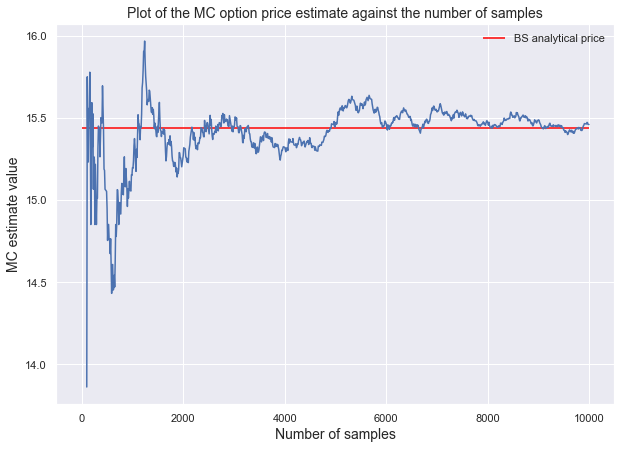

In [29]:
_ , ax = plt.subplots(figsize = (10,7))
ax.plot(sample_sizes , prices)
ax.hlines(exact_price, xmin = 0, xmax = sample_sizes[-1], color='red' , label = 'BS analytical price')
ax.set_title('Plot of the MC option price estimate against the number of samples' , fontsize = 14);
plt.xlabel('Number of samples' , fontsize = 14)
plt.ylabel('MC estimate value', fontsize = 14)
ax.ticklabel_format(useOffset=False, style='plain')
ax.legend(frameon = False);

We further discuss the appropriateness of the standard Monte Carlo estimator for determining the time-0 price of the option by analysing its asymptotic confidence intervals. Below we create two figures where each displays 20 distinct realisations of a 95% asymptotic confidence interval for the option price, with sample sizes of 1000 and 10 000 respectively. We also note that the vertical red line denotes the Black-Scholes analytical time-0 option price, and the blue dot at the centre of each confidence interval denotes the Monte Carlo estimate for the time-0 option price. 

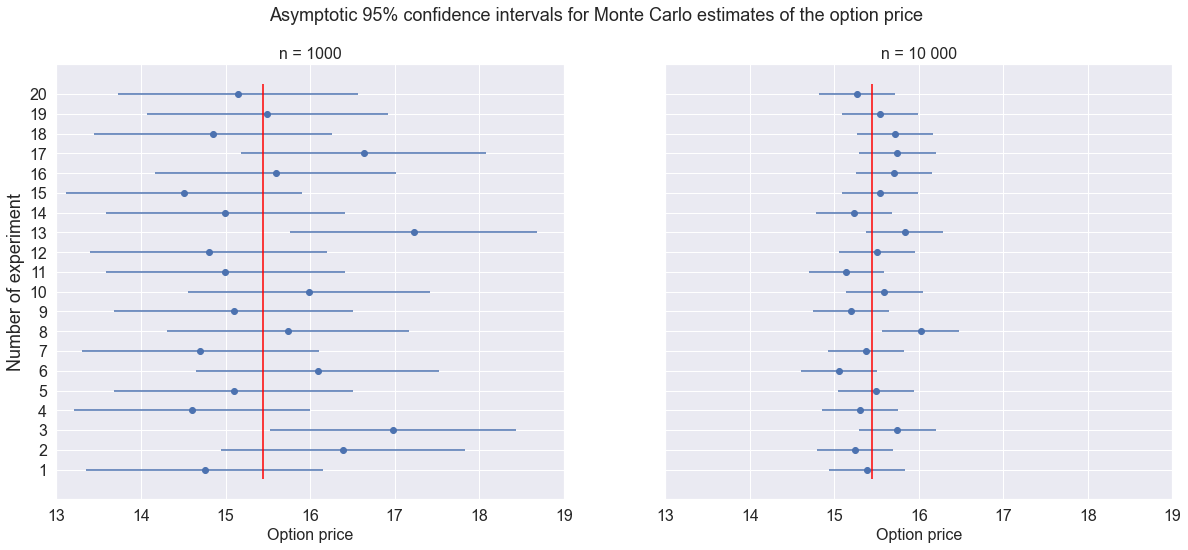

In [10]:
# We keep the model parameters unchanged

n_experiments = 20
CI_sample1 = [] # store iteration CI results
CI_sample2 = []
fig , ax = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (20, 8))

# Obtain 95% CIs using n=1000 and 95% CIs n=10_000 & plot them
for i in range(n_experiments):
    CI_sample1.append(standard_MC_option_pricing(nsamples = 1000, seed = i * 12871, c_level = 0.95, 
                                                           K=50, r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12)[2])
    
    CI_sample2.append(standard_MC_option_pricing(nsamples = 10_000, seed = i * 767576, c_level = 0.95, 
                                                           K=50, r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12)[2])   
    
    ax[0].hlines(i + 1, xmin = CI_sample1[i][0], xmax = CI_sample1[i][1])
    ax[0].plot( (CI_sample1[i][0] + CI_sample1[i][1]) / 2, i + 1, 'o', color = 'b')
    ax[1].hlines(i + 1, xmin = CI_sample2[i][0], xmax = CI_sample2[i][1])
    ax[1].plot( (CI_sample2[i][0] + CI_sample2[i][1]) / 2, i + 1, 'o', color = 'b')
    


ax[0].tick_params(labelsize = 16)
ax[0].set_xlim([13, 19])
ax[0].vlines(exact_price, ymin = 0.5, ymax=n_experiments + 0.5, color ='red', label = 'BS analytical price')
ax[0].set_yticks(range(1, n_experiments + 1))
ax[0].set_ylabel('Number of experiment', fontsize = 18)
ax[0].set_xlabel('Option price', fontsize = 16)
ax[0].set_title('n = 1000', fontsize = 16);
ax[1].tick_params(labelsize = 16)
ax[1].set_xlim([13, 19])
ax[1].vlines(exact_price, ymin = 0.5, ymax=n_experiments + 0.5, color ='red')
ax[1].set_xlabel('Option price', fontsize = 16)
ax[1].set_title('n = 10 000', fontsize = 16);
fig.suptitle('Asymptotic 95% confidence intervals for Monte Carlo estimates of the option price',  fontsize = 18);

Looking at our confidence intervals we note that the choice of $n$ becomes quite important for the estimate's accuracy. In particular, looking at the left graph, we see that even though for smaller $n$ values we observe very wide confidence intervals, we still see that in two cases the 95% confidence interval does not contain the exact time-0 option price. However, the right graph suggests that our interval estimates become much more accurate as $n$ increases.

As a final note, we highlight that obtaining an interval as narrow as possible for a given confidence level becomes very important when pricing large volumes of derivatives. This is because even small mispricings in the prices of derivatives can scale up very quickly when the sales volumes are large, and consequently affect profits. To achieve a Monte Carlo price estimate as accurate as possible, we require an enormous number of simulations, as the rate of convergence of the Monte Carlo method is $O_P(n^{-1/2}),$ which seems to be in agreement with what we observe above. As a result, high level accuracy option pricing becomes a very computationally expensive task using standard Monte Carlo estimators. This clearly suggests that variance reduction techniques are necessary to increase the accuracy of option price estimates while maintaining computational efficiency.  

### Part (e)

Following the discussion above, we use the Antithetic variates method to obtain an estimator for the time-0 price of the option with reduced variance, compared to the standard Monte Carlo estimator. Using a similar logic as in the previous parts of this question, we come up with an Antithetic variates estimator for 

\begin{align*}
\mathbb{Q}\left[ \space a < S_T < b \space \right]  = \mathbb{E}^{\mathbb{Q}}\left[ 1\{S_T \in (a,b)\} \right] \\
\end{align*}

where $\space S_T = S_0 \exp\left( \left(r - \frac{\sigma^2}{2}\right) T + \sigma W_T \right) $ as specified in the question.

To generate antithetic pairs for the random variable $S_T$ using standard Normal random variables, we use fact that $Z \sim \mathcal{N}(0,1)$ if and only if $-Z \sim \mathcal{N}(0,1)$. Then the pair $(Z,-Z)$ is an antithetic pair.

We now describe how we can generate the random variables $ S_i $ that have the same distribution as $S_T$:

1. Generate $Z_i \sim \mathcal{N}(0,1)$ using the Box-Muller method as previously described.
2. Set $ S_i = S_0 \space exp\left((r - \dfrac{σ^2}{2}) T + σ \sqrt{T} Z_i \right), \space \textrm{since} \space \sqrt{T} Z_i \sim \mathcal{N}(0,T), $ which is the same distribution $W_T$ has.

Moreover, define $ S_i^{+} := S_0 \space exp\left((r - \dfrac{σ^2}{2}) T + σ \sqrt{T} Z_i \right) $ and 
$ S_i^{-} := S_0 \space exp\left((r - \dfrac{σ^2}{2}) T - σ \sqrt{T} Z_i \right), $ where $Z_i \sim \mathcal{N}(0,1).$ Then, the pair $(S_i^{+}, S_i^{-})$ is an antithetic pair.


Given the sequence $(S_i^{+} , S_i^{-})$ of i.i.d. random vectors from the joint distribution of $( S_T^{+} , S_T^{-})$, the
antithetic variates estimator of $\mathbb{Q}\left[ \space a < S_T < b \space \right]$, with $S_T$ as defined above,
is given by

\begin{align}
I_{AV} = \frac{\overline{X}_n + \overline{Y}_n}{2},  \label{AVE}
\end{align}

where $\overline{X}_n = \frac{1}{n} \sum_{i=1}^n f(S_i^{+}) $ and $\overline{Y}_n = \frac{1}{n} \sum_{i=1}^n f(S_i^{-}),$ with $f(x) = 1\{a < x < b\} $.

Since the random vectors in the sequence $\left((S_i^{+}, S_i^{-}) , \space i = 1, 2, \ldots \right)$ are independent, we can see that the variance of the antithetic variates estimator $I_{AV}$ is given by

\begin{align*}
{\rm Var} (I_{AV})
&= \frac{1}{2n} \space \left ({\rm Var} ( f(S_T^{+})) + {\rm Cov} (f(S_T^{+}) , \space f(S_T^{-})) \space \right) = 
\frac{1}{2n} \left( {\rm Var} ( 1\{a < S_T^{+} < b\} ) + {\rm Cov} (1\{a < S_T^{+} < b\}) , \space 1\{a < S_T^{-} < b\} \space \right)
\end{align*}

by using results proved in chapter 4, section 4.2 of the lecture notes.

We can easily see from previous parts that the Antithetic variates estimator for the time-0 price of the option, $V_0$, is given by $ V^{AV}_0 := Ke^{-rT} I_{AV} $.

Similarly, the variance of the estimator $V^{AV}_0$ is given by ${\rm Var} (V^{AV}_0) = K^2 e^{-2rT} {\rm Var} (I_{AV})$.

Lastly, by analysing the ${\rm Var} (I_{AV})$ expression, we can deduce that the variance reduction effectiveness of this technique is heavily dependent on the magnitude of the negative correlation between the $( 1\{a < S_i^{+} < b\} , \space  1\{a < S_i^{-} < b\} )$ random variable pairs. 


In [18]:
def antithetic_option_pricing(nsamples, seed, K, r, T, σ, S0, a, b, corr_display = False):
    
    """
    Parameters
    ----------
    nsamples: Number of simulated random variables to be used in the Monte Carlo calculations
    seed: Seed for random number generation reproducibility.
    K: Fixed payoff of the option when it is in-the-money
    r: The non-negative constant interest rate
    T: Maturity date
    σ: Volatility of the stock (must be positive)
    S0: Initial stock price
    a: Lower end-point of the in-the-money interval of the option
    b: Upper end-point of the in-the-money interval of the option
    corr_display: Set this to True if you want the function to print the sample correlation between the 
                  1{a < S_i(+) < b} and 1{a < S_i(-) < b} random variables.
    
    Returns
    -------
    antithetic_estimate_price : Antithetic variates estimate for the time-0 option price
    antithetic_estimate_var : Variance of the Antithetic variates estimate for the time-0 option price
    
    """
    #Use half the nsamples for the random sample for fair comparison with the standard MC estimator
    nsamples = nsamples // 2 
    
    rng = np.random.default_rng(seed = seed)
    z_i = rng.standard_normal(size = nsamples)
    
    s_plus = S0 * np.exp((r - σ**2/2) * T + σ * np.sqrt(T) * z_i) # S_T variables
    s_minus = S0 * np.exp((r - σ**2/2) * T - σ * np.sqrt(T) * z_i)
    
    if corr_display:
        corr = np.corrcoef( np.where(np.logical_and(a < s_plus , s_plus < b), 1, 0), 
                            np.where(np.logical_and(a < s_minus , s_minus < b), 1, 0))[0,1]
        
        print('Correlation between the 1[a < S_i(+) < b] and 1[a < S_i(+) < b] random variables: {:.4f}'.format(corr))

    MC_samples = ( K * np.exp(-r * T)) * ( np.where(np.logical_and(a < s_plus , s_plus < b), 1, 0) 
                                          + np.where(np.logical_and(a < s_minus , s_minus < b), 1, 0) ) / 2
    
    antithetic_estimate_price = MC_samples.mean()
    
    antithetic_estimate_var = MC_samples.var() / len(MC_samples)
    
    return antithetic_estimate_price, antithetic_estimate_var

In [19]:
AV_price , AV_var = antithetic_option_pricing(nsamples = 100_000, seed = 12881, K=50, r=0.01, T=1, 
                                              σ=0.2 , S0=10, a=10, b=12, corr_display = True)

Correlation between the 1[a < S_i(+) < b] and 1[a < S_i(+) < b] random variables: -0.4525


By noting this correlation value, we should expect to see a satisfactory reduction in the variance of our Antithetic estimator compared to that of the standard Monte Carlo estimator.

In [95]:
print(f'Black-Scholes analytical time-0 price of the option: {exact_price:.8f}.')
print(f'Standard Monte Carlo time-0 price estimate: {MC_price:.8f}, with variance of {MC_var:.8f}.')
print(f'Antithetic Variates time-0 price estimate: {AV_price:.8f}, with variance of {AV_var:.8f}.')
print('\n')
print(f'Empirical variance reduction: {100 * (1 - (AV_var / MC_var)) :.8f}%')

Black-Scholes analytical time-0 price of the option: 15.44170153.
Standard Monte Carlo time-0 price estimate: 15.48734955, with variance of 0.00526804.
Antithetic Variates time-0 price estimate: 15.42200626, with variance of 0.00287751.


Empirical variance reduction: 45.37798383%


Using the Antithetic Variates method we managed to reduce the variance by 45.38% compared to the standard Monte Carlo estimator, and hence conclude that this technique works relatively well in this specific setting. Furthermore, we analyse the effectiveness of this method graphically by plotting the sample variance of the Antithetic Variates estimator on the same graph as the **analytical variance** of the Monte Carlo estimator, and compare how they vary for small sample sizes and with the option parameters used before. From the graph we can see that as we should expect, the variance of the Antithetic Variates estimator converges faster to zero compared to the analytical variance of the standard Monte Carlo estimator.

Note that we consider small sample sizes because the variance of both estimators will be close to zero for large sample sizes and hence a graph will not be very helpful in illustrating the variance reduction effectiveness.  

In [96]:
analytical_sample_size = np.linspace(start = 0.01, stop = 1000, num = 1000, endpoint = False)
prob_in_money = exact_price / (50 * np.exp(-0.01 * 1)) # This is Q[a < S_T < b]
# function to calculate the analytical MC variance
mc_analytical_var = lambda n: ((50**2) * np.exp(-0.02 * 1) ) * ( (prob_in_money * (1 - prob_in_money)) / n ) 
var_estimates = mc_analytical_var(analytical_sample_size)

AV_vars = [] # store the variance estimates of each iteration

# Calculate AV estimate variance for different sample sizes
for n in np.arange(10, 1000 , 10):
    AV_vars.append(antithetic_option_pricing(nsamples = n, seed = 12881, K=50, r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12)[1] )

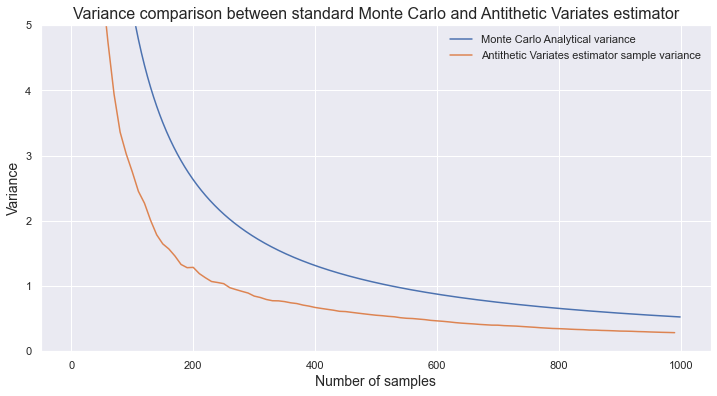

In [97]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(analytical_sample_size, var_estimates, label = 'Monte Carlo Analytical variance')
ax.plot(np.arange(10, 1000 , 10), AV_vars, label = 'Antithetic Variates estimator sample variance')
plt.legend(frameon = False);
plt.xlabel('Number of samples', fontsize = 14);
plt.ylabel('Variance', fontsize = 14)
ax.set_ylim([0, 5]);

plt.title('Variance comparison between standard Monte Carlo and Antithetic Variates estimator', fontsize = 16);

To conclude on the overall effectiveness of this technique with the specified option parameters, we compare the percentage variance reduction for different sample sizes.

In [123]:
var_reduction = [] # store variance reduction for each iteration

for n in np.arange(50_000, 510_000, step=1000):
    var_red = 100 * (1 - (antithetic_option_pricing(nsamples = n, seed = 1289, K=50, r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12)[1] 
                                       / standard_MC_option_pricing(nsamples = n, seed = 1927, c_level = 0.95, K=50, 
                              r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12)[1]))
    var_reduction.append(var_red)

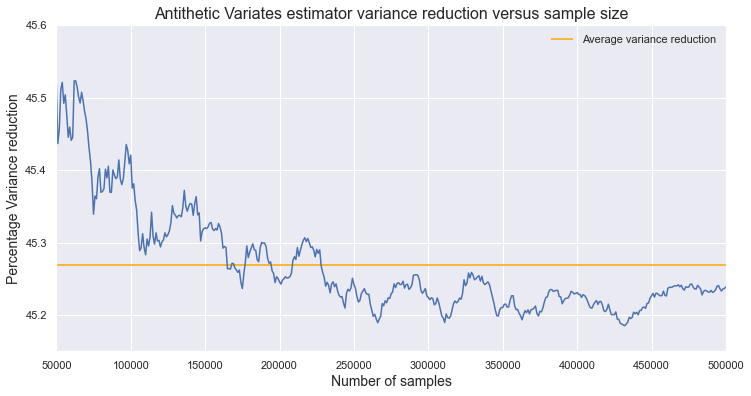

In [136]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(np.arange(50_000, 510_000, step=1000), var_reduction)
plt.xlabel('Number of samples', fontsize = 14);
plt.ylabel('Percentage Variance reduction', fontsize = 14)
ax.set_ylim([45.15, 45.60]);
ax.set_xlim([50_000 , 500_000])
ax.hlines(np.mean(var_reduction), xmin = 50_000, xmax = 500_000, color='orange' , label = 'Average variance reduction');
plt.title('Antithetic Variates estimator variance reduction versus sample size', fontsize = 16);
ax.legend(frameon = False);

Judging from the graph, even though there are some fluctuations due to randomness, we observe that eventually the percentage variance reduction is relatively stable around its mean value, which is approximately 45.27%. Hence, we are able to argue with confidence that this variance reduction technique works effectively in this example. 

One final thing to note is that one needs to be careful before using this variance reduction technique in a different setting, for example when pricing this option using a different set of parameters. As illustrated in lectures, the effectiveness of a variance reduction technique can be heavily dependent on the option's parameter values. As a result, what seemed to be an effective variance reduction technique in this question, might not necessarily be as effective with a different set of parameter values.

## Problem 4

### Part (a)

In this question, the dynamics (under the risk-neutral measure) of the risky asset are given by the following Stochastic Differential Equation (SDE)

$$ dS_t = rS_t dt + \sigma \sqrt{S_t} dW_t. $$

where $(W_t)_t \geq 0$ is a Brownian motion under the risk-neutral measure and $ \sigma > 0 .$

Here, we introduce the first-order Euler scheme in order to find a discrete-time approximation $\hat{S}$ of the continuous-time stochastic process $S$, on the discrete time grid $0 < h < 2h \ldots < nh ,$ using $h := \dfrac{T}{n} > 0$ for some $n \in \mathbb{N},$ and $T$ denoting the time to maturity of the option.

The first-order Euler scheme for the above SDE is given by $\hat{S}_0 = S_0$ and 

\begin{align}
\hat{S}_{(i+1)h} &= \hat{S}_{ih} + r \hat{S}_{ih} h 
+ \sigma \sqrt{ \hat{S}_{ih} } (W_{(i+1)h} - W_{ih}) \\
&= \hat{S}_{ih} ( 1 + rh ) + \sigma \sqrt{ \hat{S}_{ih} } (W_{(i+1)h} - W_{ih}) \\
&= \hat{S}_{ih} ( 1 + rh ) + \sigma \sqrt{ \hat{S}_{ih} } \sqrt{h} Z_{i+1}
\qquad i = 0, 1, 2, \ldots, n-1
\end{align}

where $Z_1, \ldots, Z_n$ are i.i.d. $\mathcal{N}(0,1)$ that can be generated using the Box-Muller method described in question 3 part (b.2).

We note that the final equality follows from the fact that for any $i \geq 0$ and $h>0,$ $\sqrt{h} Z$ has the same distribution as $W_{(i+1)h} - W_{ih},$ where $Z \sim \mathcal{N}(0,1)$ and $(W_t)_t \geq 0$ is a Brownian motion under the risk-neutral measure.

In addition, let us also state that the Euler scheme introduces a discretisation bias and does not guarantee the non-negativity of the process $S.$ However, since $S$ represents the price of an asset, the non-negativity property is an important one. Therefore, to account for this, we replace negative $S$ approximation values by zero. 

In [16]:
def Euler_simulate_S(h, T, r, σ, S0, seed = 1698, return_path = False):
    
    """
    Parameters
    ----------
    h: Time interval between successive grid points.
    r: The non-negative constant interest rate.
    T: Maturity date (must be positive).
    σ: Volatility of the stock (must be positive).
    S0: Initial stock price (must be positive).
    seed: Seed for random number generation reproducibility.
    return_path: Set this to True if you want the function to return the whole path of the prices.
    
    Returns
    -------
    S : Returns a maturity stock price realisation (using return_path=False).
    z : Returns the sample of standard normals used in the scheme of part (a) (useful for subsequent parts of the question).
    """
    
    n_steps = int(T / h) # Number of points in the grid
    rng = np.random.default_rng(seed) # Set the seed for reproducible results
    z = rng.standard_normal(n_steps) 
    
    S = [S0] # Initialise a list to store the approximation values of S
    
    for i in range(n_steps - 1):
        
        s = S[i] * ( 1 + r * h ) + ( σ * np.sqrt(S[i]) ) * ( np.sqrt(h) * z[i+1]  ) # S_(i+1)h estimate using part (a)
        
        # Make sure that S values don't go below zero
        if s < 0:
            S.append(0)
        else:
            S.append(s)
            
    if return_path: # return the whole path
        return S , z
    
    return S[-1] , z   

Below, we create a plot of ten sample path realisations of $S$ using the parameters provided in the question, that is $S_0=10, \space r=0.01, \space σ=0.2, \space T=1$ and $h=\dfrac{1}{250}$.

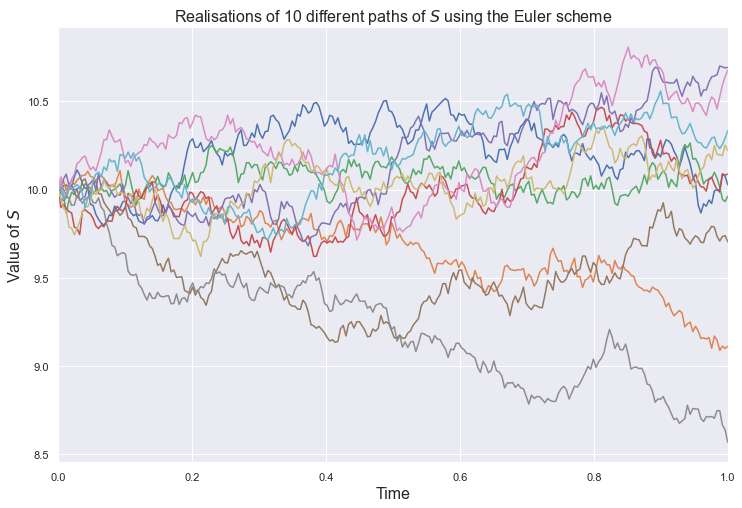

In [17]:
sample_paths = 10 # number of path realisations required
_ , ax = plt.subplots(figsize = (12,8))
t = np.linspace(0, 1, 250) # time points using h=1/250

for i in range(sample_paths):
    ax.plot(t, Euler_simulate_S(h = 1/250, T=1, r=0.01, σ=0.2, S0=10, seed = i, return_path = True)[0]) # plot path realisation
    
ax.set_xlabel('Time', fontsize = 16);
ax.set_ylabel('Value of $S$', fontsize = 16);
ax.set_xlim([0,1]);
ax.set_title('Realisations of 10 different paths of $S$ using the Euler scheme', fontsize = 16);

### Part (b)

Let $P_0$ denote the time-0 price of the option with random payoff $H$ as specified in the question. The evolution of the stock price process is as specified by the Stochastic Differential Equation in part (a). With this in mind, and using the fact that the price of every derivative is given by its expected discounted payoff under the risk-neutral probability, the analytical formula for the time-0 option price is given by 

\begin{align} 
	P_0 &= \mathbb{E}^{\mathbb{Q}}\left[ e^{-rT} H(S_T) \right]  \\
    &= \mathbb{E}^{\mathbb{Q}}\left[ e^{-rT} K \space 1\{S_T \in (a,b)\} \right] \\
    &= K e^{-rT} \mathbb{E}^{\mathbb{Q}}\left[ 1\{S_T \in (a,b)\} \right] \\
    &= K e^{-rT} \mathbb{Q}\left[ \space a < S_T < b \space \right]
\end{align}

Using the Euler scheme described in part (a), we can simulate paths of the desired stochastic process and obtain a sample of maturity stock prices. In turn, by following a similar reasoning to the one in Problem 3, a Monte Carlo estimator for $ \mathbb{Q}\left[ \space a < S_T < b \space \right] $ is given by 

$$ \dfrac{1}{n} \sum_{i=1}^{n} 1\{ a < S^{i}_T < b \} ,$$ where $ S^{i}_T $ are the **maturity** stock price random variables simulated using the Euler scheme from part (a).

Finally, a Monte Carlo estimator for the time-0 price of the option is given by 

$$ P_0^{MC} = \dfrac{Ke^{-rT}}{n} \sum_{i=1}^{n} 1\{ a < S^i < b \} .$$

Moreover, by following an identical argument to the one in problem 3, part (b.3), we can easily see that the variance of our Monte Carlo estimator for the time-0 price of the option $P_0$ is given by 

\begin{align*}
{\rm Var} \left( P_0^{MC} \right)  
= K^2 e^{-2rT} \space \dfrac{\mathbb{Q}\left[ \space a < S_T < b \space \right] \left( 1 -  \mathbb{Q}\left[ \space a < S_T < b \space \right] \right)}{n}.
\end{align*}

For completeness, we also mention that asymptotic confidence intervals for the time-0 price of the option can be obtained in exactly the same way as described in part (b.4) of question 3.

### Part (c)

In [32]:
def Q4_standard_MC_option_pricing(nsamples, c_level, h, K, r, T, σ, S0, a, b):
    
    """
    Parameters
    ----------
    nsamples: Number of simulated random variables to be used in the Monte Carlo calculations
    c_level: Level of the confidence interval, should be in (0,1)
    h: Time interval between successive grid points, used in the Euler scheme
    K: Fixed payoff of the option when it is in-the-money (must be positive)
    r: The non-negative constant interest rate
    T: Maturity date (must be positive)
    σ: Volatility of the stock (must be positive)
    S0: Initial stock price (must be positive)
    a: Lower end-point of the in-the-money interval of the option (must be positive)
    b: Upper end-point of the in-the-money interval of the option (must be greater than a)
    
    Returns
    -------
    MC_option_price : Monte Carlo estimate for the time-0 option price
    MC_option_price_var: Variance of the standard Monte Carlo estimate for the time-0 option price
    confidence_interval: Asymptotic ('c_level' * 100)% confidence interval for the time-0 option price 
    
    """
    
    alpha = sc.stats.norm.ppf(q = 1 - ( (1 - c_level) / 2) , loc = 0, scale = 1) # Used in the confidence interval
    
    S_T = [] # initialise a list to store the generated maturity stock prices
    
    for i in range(nsamples):
        S_T.append(Euler_simulate_S(h, T, r, σ, S0, seed = 100 * i, return_path = False)[0]) # store maturity price
    
    
    # MC estimator for Q[ a < S_T < b ] - This part is the same as in the MC estimator in Problem 3(c.2)
    
    I_MC = sum( np.logical_and( a < np.array(S_T) , np.array(S_T) < b) ) / nsamples
    
    I_MC_std = ( (I_MC * (1 - I_MC)) / nsamples ) ** 0.5 # standard deviation of I_MC
    
    MC_option_price = (K * np.exp(-r * T)) * I_MC # MC estimate for the option price
     
    MC_option_price_std = (K * np.exp(-r * T)) * I_MC_std # standard deviation of option price MC estimate
    
    MC_option_price_var = MC_option_price_std**2 # variance of option price MC estimate
    
    confidence_interval = [  ( MC_option_price - (alpha * MC_option_price_std) ) , 
                               ( MC_option_price + (alpha * MC_option_price_std) ) ]
    

    return MC_option_price , MC_option_price_var, confidence_interval

In [33]:
# NOTE: We still use h=1/250 in the Euler scheme

price, var, ci = Q4_standard_MC_option_pricing(nsamples = 10_000, c_level = 0.95, h = 1/250, 
                              K=50, r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12)

print(f'Standard Monte Carlo time-0 price estimate: {price:.8f}, with variance of {var:.8f}.')
print(f'95% Asymptotic confidence interval for the time-0 price estimate with a sample size of 10 000: \n{ci}')

Standard Monte Carlo time-0 price estimate: 27.57288787, with variance of 0.06046625.
95% Asymptotic confidence interval for the time-0 price estimate with a sample size of 10 000: 
[27.090934955054944, 28.05484078477372]


Since we do not have an analytical time-0 price for the option to compare our results with, we use our function above to obtain a series of prices and their respective asymptotic confidence intervals for different values of the sample size. From the plot below, we can confidently say that the Monte Carlo estimate for time time-0 option price is converging to a value very close to 27.50. Furthermore, from the graph we deduce that we need large sample sizes such that the width of the 95% confidence intervals is sufficiently small to yield accurate estimates for the option price. 

A major issue that cannot be realised from the graph but should be pointed out is that such a high level of accuracy requires large sample sizes and consequently comes at a huge computational cost, since millions of random numbers must be generated for the Euler scheme to obtain the different realisations of the stock paths required to price this option. We can therefore conclude that accurately pricing options in this way using standard Monte Carlo methods becomes a very hard or even practically infeasible task. Once again, variance reduction techniques are required to accurately price such an option in a computationally feasible way. 

In [22]:
# WARNING: This cell takes a long time to run

sample_s = np.arange(1000, 211_000, 10_000) # sample sizes to calculate prices
q4_prices = [] 
q4_CI = []

# Calculate the price and asymptotic CI for different sample sizes (using the same parameters as before)
for n in sample_s:
    p , _ , CI = Q4_standard_MC_option_pricing(nsamples = n, c_level=0.95, h=1/250, 
                              K=50, r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12)
    q4_prices.append(p)
    q4_CI.append(CI)

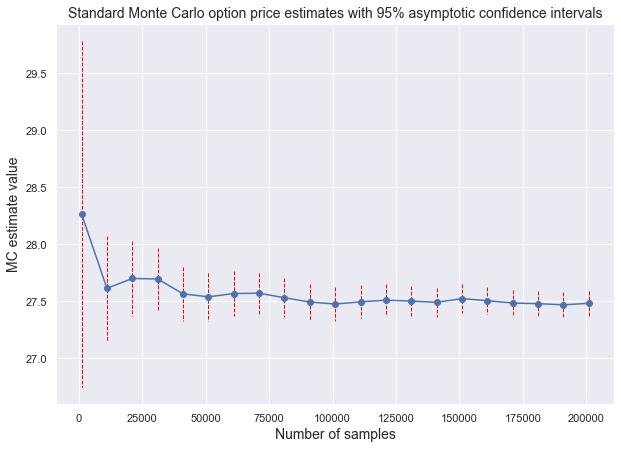

In [89]:
# Difference between the upper end-point of each CI and the MC estimate; required for the errors bars
upper_error = [q4_CI[i][0] - q4_prices[i] for i in range(len(q4_prices))]

_ , ax = plt.subplots(figsize = (10,7))
eb = plt.errorbar(sample_s, q4_prices, yerr = upper_error, fmt = '-o', ecolor = 'red', elinewidth = 1)
eb[-1][0].set_linestyle('--')
ax.set_title('Standard Monte Carlo option price estimates with 95% asymptotic confidence intervals' , fontsize = 14);
plt.xlabel('Number of samples' , fontsize = 14)
plt.ylabel('MC estimate value', fontsize = 14);

### Part (d)

Moving on to the variance reduction part of this question, we now describe and implement two Control Variate estimators for approximating the time-0 price of the option, $P_0$, with payoff as described in the question.

We describe **the first control variate estimator** as follows:

Let $S_i$ be i.i.d. random variables with the same distribution as $S_T$, the maturity stock price. Moreover, let $X = e^{-rT} S_T $ and define $X_i := e^{-rT} S_i.$ 

Note that $ \mathbb{E}^{\mathbb{Q}} [X_i] = \mathbb{E}^{\mathbb{Q}} [X] =  \mathbb{E}^{\mathbb{Q}} [e^{-rT} S_T] = S_0 ,$ since the discounted stock price process is a $\mathbb{Q}-$martingale.

Also let $Y = Ke^{-rT} 1\{a < S_T < b \}$, and define $Y_i := Ke^{-rT} 1\{a < S_i < b \} = Ke^{-rT} 1\{a < e^{rT} X_i < b \}$.

To generate the $S_i$, we can use the first-order Euler scheme specified in part (a) repeatedly to obtain a random sample of maturity stock prices.

Given the sequence $(X_i,Y_i)$ of i.i.d. random vectors from the joint distribution of $(X,Y)$, we define

\begin{align*}
 Y_i (b) = Y_i - b \left( X_i - \mathbb{E}^{\mathbb{Q}} [X] \right) = Ke^{-rT} 1\{a < S_i < b \} - b \left( e^{-rT} S_i - S_0 \right), \quad \text{for } i
=1, 2, \ldots , n
\end{align*}

where $b \in \mathbb{R}$ is a constant, and $X_i, Y_i$ are as defined above.


The control variate estimator with parameter $b$ for $P_0$ is defined by

\begin{align}
P_0^{CV1} (b) := \frac{1}{n} \sum _{i=1}^n \left( Y_i - b \left( X_i - \mathbb{E}^{\mathbb{Q}}[X] \right) \right) = \frac{1}{n} \sum _{i=1}^n \left( Ke^{-rT} 1\{a < S_i < b \} - b \left( e^{-rT} S_i - S_0 \right) \right) = \frac{1}{n} \sum _{i=1}^n Y_i (b) .
\end{align}

The mean of our control variate estimator is

\begin{align}
\mathbb{E}^{\mathbb{Q}} \left[ P_0^{CV1} (b) \right] = \frac{1}{n} \sum _{i=1}^n
\mathbb{E}^{\mathbb{Q}} \left[ Y_i (b) \right] = \frac{1}{n} \sum _{i=1}^n
\mathbb{E}^{\mathbb{Q}} \left[ Y_i \right] = \mathbb{E}^{\mathbb{Q}} [Y] = \mathbb{E}^{\mathbb{Q}}\left[ Ke^{-rT} 1\{a < S_T < b \} \right] 
= \mathbb{E}^{\mathbb{Q}}\left[ e^{-rT} H(S_T) \right] = P_0,
\end{align}

where the last equality is obtained using the risk-neutral pricing framework. Hence, our estimator is unbiased.

As seen in lectures, the value $b^*$ of the parameter $b$ that minimizes the variance of $P_0^{CV1} (b)$ is given by

\begin{align}
b^* = \frac{ {\rm Cov} (X,Y)} {{\rm Var} (X)}) = \frac{{\rm Cov} (e^{-rT} S_T,\space Ke^{-rT} 1\{a < S_T < b \})}{{\rm Var} (e^{-rT} S_T)} = \frac{{\rm Cov} (e^{-rT} S_T - S_0,\space Ke^{-rT} 1\{a < S_T < b \})}{{\rm Var} (e^{-rT} S_T - S_0)} \\
= \frac{{\rm Cov} (X - \mathbb{E}^{\mathbb{Q}} [X],\space Y)}{{\rm Var} (X -\mathbb{E}^{\mathbb{Q}} [X])}
\end{align}

However, in this case, since we don't know the value of ${\rm Cov} (X,Y)$, in our calculations we replace $b^*$ by its unbiased estimator

\begin{align}
 \hat{b}^* = \dfrac{\sum _{i=1}^n \left( X_i - \overline{X}_n \right)
\left( Y_i - \overline{Y}_n \right)} {\sum _{i=1}^n \left( X_i - \overline{X}_n \right)^2},
\end{align}

where $\overline{X}_n$ and $\overline{Y}_n$ denotes the sample mean of the $X_i$ and $Y_i$ random samples respectively.

Therefore, our control variates estimator is given by:

$$ P_0^{CV1} \left( \hat{b}^* \right) = \frac{1}{n} \sum _{i=1}^n \left( Ke^{-rT} 1\{a < S_i < b \} - \hat{b}^* \left( e^{-rT} S_i - S_0 \right) \right) = \frac{1}{n} \sum _{i=1}^n Y_i \left( \hat{b}^* \right) . $$

Lastly, the variance of the estimator is given by 

\begin{align}
{\rm Var} \left(P_0^{CV1} \left( \hat{b}^* \right) \right) & = \frac{1}{n^2} \sum _{i=1}^n {\rm Var} \left(Y_i \left( \hat{b}^* \right) \right) \\
&= \frac{1}{n} {\rm Var} \left(Y_i \left( \hat{b}^* \right)\right)  \\
&= \frac{1}{n} \left({\rm Var} (Y) - 2 \hat{b}^* {\rm Cov} (X,Y) + \left( \hat{b}^* \right)^2 {\rm Var} (X) \right) \\
&= \frac{1}{n} \left( {\rm Var} (Y) - \frac{{\rm Cov} (X,Y)^2} {{\rm Var} (X)} \right) \\
&= \frac{1}{n} \left( {\rm Var} (Y) - \left( \hat{b}^* \right)^2 {\rm Var} (X) \right)
\end{align}


Moving on to **the second control variate estimator**, we now choose a different random variable to be used as a control.

We remind ourselves that stock price paths are obtained using the first-order Euler scheme according to the following equation:

$$ \hat{S}_{(i+1)h} =  \hat{S}_{ih} ( 1 + rh ) + \sigma \sqrt{ \hat{S}_{ih} } \sqrt{h} Z_{i+1} \qquad i = 0, 1, 2, \ldots, n-1, $$
and $\hat{S}_0 = S_0$.

By observing the above equation, we notice that the only source of randomness in each stock price approximation in the path comes from the standard Normal random variables. Hence, by noting the dependence of the stock prices on the i.i.d standard Normal random variables $Z_i$ used in each stock price path realisation, we let $X = \sum_{j=1}^{k}  Z_j$, where $k$ denotes the number of equidistant intervals in our discrete-time grid definded in part (a). In addition, define $ X_i := \sum_{j=1}^{k}  Z^{i}_j $ to be the sum of the standard Normal random variables used in the $i^{th}$ stock price path realisation. Then, $ X_i $ are i.i.d random variables with the same distribution as $X$. We now have that $ \mathbb{E}^{\mathbb{Q}} [X_i] = \mathbb{E}^{\mathbb{Q}} [X] = \mathbb{E}^{\mathbb{Q}} \left[ \sum_{j=1}^{k}  Z_i \right] = 0 $, since each $Z_i \sim \mathcal{N}(0,1).$

In a similar manner as in the first control variate estimator, we let $ Y = Ke^{-rT} 1\{a < S_T < b \} $ and consequently define $ Y_i := Ke^{-rT} 1\{a < S_i < b \} ,$ where $S_T$ is the maturity stock price and the $S_i$ are as defined above. 

Given the sequence $(X_i,Y_i)$ of i.i.d. random vectors from the joint distribution of $(X,Y)$, we define

\begin{align*}
 Y_i (b) := Y_i - b \left( X_i - \mathbb{E}^{\mathbb{Q}} [X] \right)  = Ke^{-rT} 1\{a < S_i < b \} - b \sum_{j=1}^{k}  Z^{i}_j , \quad \text{for } i
=1, 2, \ldots , n
\end{align*}

where $b \in \mathbb{R}$ is a constant, and $X_i, Y_i$ are as defined above.


The control variate estimator with parameter $b$ for $P_0$ is defined by

\begin{align}
P_0^{CV2} (b) := \frac{1}{n} \sum _{i=1}^n \left( Y_i - b \left( X_i - \mathbb{E}^{\mathbb{Q}}[X] \right) \right) = \frac{1}{n} \sum _{i=1}^n \left( Ke^{-rT} 1\{a < S_i < b \} - b \sum_{j=1}^{k}  Z^{i}_j \right) = \frac{1}{n} \sum _{i=1}^n Y_i (b) .
\end{align}

The mean of our control variate estimator is

\begin{align}
\mathbb{E}^{\mathbb{Q}} \left[ P_0^{CV2} (b) \right] = \frac{1}{n} \sum _{i=1}^n
\mathbb{E}^{\mathbb{Q}} \left[ Y_i (b) \right] = \frac{1}{n} \sum _{i=1}^n
\mathbb{E}^{\mathbb{Q}} \left[ Y_i \right] = \mathbb{E}^{\mathbb{Q}} [Y] = \mathbb{E}^{\mathbb{Q}}\left[ Ke^{-rT} 1\{a < S_T < b \} \right] 
= \mathbb{E}^{\mathbb{Q}}\left[ e^{-rT} H(S_T) \right] = P_0,
\end{align}

and therefore our estimator is unbiased.

As seen in lectures, the value $b^*$ of the parameter $b$ that minimizes the variance of $P_0^{CV2} (b)$ is given by

\begin{align}
b^* = \frac{ {\rm Cov} (X,Y)} {{\rm Var} (X)}) = \frac{{\rm Cov} \left( \space \sum_{j=1}^{k}  Z_j, \space Ke^{-rT} 1\{a < S_T < b \}\right)}{{\rm Var} \left( \sum_{j=1}^{k}  Z_j \right)}
\end{align}

However, in this case, since we don't know the value of ${\rm Cov} (X,Y)$, in our calculations we replace $b^*$ by its unbiased estimator

\begin{align}
 \hat{b}^* = \dfrac{\sum _{i=1}^n \left( X_i - \overline{X}_n \right)
\left( Y_i - \overline{Y}_n \right)} {\sum _{i=1}^n \left( X_i - \overline{X}_n \right)^2},
\end{align}

where $\overline{X}_n$ and $\overline{Y}_n$ denotes the sample mean of the $X_i$ and $Y_i$ random samples respectively.

Therefore, our control variates estimator is given by:

$$ P_0^{CV2} \left( \hat{b}^* \right) = \frac{1}{n} \sum _{i=1}^n \left( Ke^{-rT} 1\{a < S_i < b \} -  \hat{b}^* \sum_{j=1}^{k}  Z^{i}_j \right) = \frac{1}{n} \sum _{i=1}^n Y_i \left( \hat{b}^* \right) . $$

For completeness, we state that the variance of the estimator is given by the same expression as the one derived in the first control variate estimator, but using the random variables $X$ and $Y$ we have defined here.

In [29]:
def Q4_control_variates_pricing(control_type, nsamples, h, K, r, T, σ, S0, a, b, corr_display = False):
    
    """
    Parameters
    ----------
    control_type: Use this argument to choose the random variable used as control, as described above (enter either 1 or 2).
    nsamples: Number of simulated random variables to be used in the Monte Carlo calculations.
    h: Time interval between successive grid points, used in the Euler scheme
    K: Fixed payoff of the option when it is in-the-money (must be positive).
    r: The non-negative constant interest rate.
    T: Maturity date (must be positive).
    σ: Volatility of the stock (must be positive).
    S0: Initial stock price (must be positive).
    a: Lower end-point of the in-the-money interval of the option (must be positive).
    b: Upper end-point of the in-the-money interval of the option (must be greater than a).
    corr_display: Set this to True if you want the function to print the sample correlation between this Xi s and Yi s.
    
    Returns
    -------
    cv_estimator_price : Control variates estimate for the time-0 option price.
    cv_estimator_var: Variance of the Control variates estimate for the time-0 option price.
    
    """
    
    S_T = np.zeros(nsamples) # initialise an array to store the generated maturity stock prices
    
    Z_i = np.zeros(nsamples) # store the *SUM* of standard normals from each path realisation
    
    for k in range(nsamples):
        
        ST , Z = (Euler_simulate_S(h, T, r, σ, S0, seed = 100 * k, return_path = False )) 
        S_T[k] = ST
        Z_i[k] = sum(Z) 
    
    if control_type == 1: # Use control variate estimator 1 from above (stock price used as a control)
        
        X_i = np.exp(-r * T) * S_T
        Y_i = ( K * np.exp(-r * T) ) * np.where(np.logical_and(a < np.exp(r * T) * X_i , np.exp(r * T) * X_i < b), 1, 0)
        cv_correction = X_i - S0 # correction term in Y_i(b)
        bstar = np.cov(Y_i, cv_correction)[0, 1] / cv_correction.var()
        MC_samples = Y_i - bstar * cv_correction
        
        if corr_display:
            print(f'Correlation between X_i s and Y_i s: {np.corrcoef(X_i, Y_i)[0,1] : .4f}')
    
    else: # Use control variate estimator 2 from above
        
        Y_i = K * np.exp(-r * T) * np.where(np.logical_and(a < S_T , S_T < b), 1, 0)
        bstar = np.cov(Y_i, Z_i)[0, 1] / Z_i.var()
        MC_samples = Y_i - bstar * Z_i
        
        if corr_display:
            print(f'Correlation between X_i s and Y_i s: {np.corrcoef(Z_i, Y_i)[0,1] : .4f}')
        
    cv_estimator_price = MC_samples.mean() # Estimate for the time-0 option price
    
    cv_estimator_std = MC_samples.std() / np.sqrt(len(MC_samples))
    
    cv_estimator_var = cv_estimator_std ** 2
    
    
    return cv_estimator_price , cv_estimator_var

In [34]:
# Let's see the results using method 1
cv1_price , cv1_var = Q4_control_variates_pricing(control_type=1, nsamples=10_000, h=1/250, K=50, 
                            r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12, corr_display = True)
print('\n')
print(f'Standard Monte Carlo time-0 price estimate: {price:.8f}, with variance of {var:.8f}.')
print(f'Type 1 control variates Monte Carlo price estimate: {cv1_price:.8f}, with variance of {cv1_var:.8f}.')
print('\n')
print(f'Empirical variance reduction: {100 * (1 - (cv1_var / var)) :.8f}%')

Correlation between X_i s and Y_i s:  0.7796


Standard Monte Carlo time-0 price estimate: 27.57288787, with variance of 0.06046625.
Type 1 control variates Monte Carlo price estimate: 27.52099288, with variance of 0.02371819.


Empirical variance reduction: 60.77449922%


In [35]:
# Let's now use method 2 using the sum of Zi
cv2_price , cv2_var = Q4_control_variates_pricing(control_type=2, nsamples=10_000, h=1/250, K=50, 
                            r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12, corr_display = True)
print('\n')
print(f'Standard Monte Carlo time-0 price estimate: {price:.8f}, with variance of {var:.8f}.')
print(f'Type 2 control variates Monte Carlo price estimate: {cv2_price:.8f}, with variance of {cv2_var:.8f}.')
print('\n')
print(f'Empirical variance reduction: {100 * (1 - (cv2_var / var)) :.8f}%')

Correlation between X_i s and Y_i s:  0.7805


Standard Monte Carlo time-0 price estimate: 27.57288787, with variance of 0.06046625.
Type 2 control variates Monte Carlo price estimate: 27.50293764, with variance of 0.02362703.


Empirical variance reduction: 60.92526230%


Referring to section 4.1 of Chapter 4 in the lecture notes we see that

\begin{align}
\frac{{\rm Var} \left(P_0^{CVi} \left( \hat{b}^* \right)\right)} {{\rm Var}(P^{MC}_0)} = 1 -
\frac{{\rm Cov} (X,Y)^2}{{\rm Var} (X) {\rm Var}(Y)} = 1 - \rho_{XY}^2, \quad \textrm{for} \space i = 1,2
\end{align}
where $\rho_{XY}$ is the correlation between $X$ and $Y$.

Based on the above mathematical relationship for the ratio of the variances of the two estimators, and given that $\rho_{XY}$ is large in absolute value, as expected the control variate technique proves to be very effective, with both methods yielding very similar results as a result of their correlation value similarities.

In [36]:
# WARNING: This cell takes a long time to run

p1, p2, p3 = [], [], [] # store prices 
v1, v2, v3 = [], [], [] # store variances

for n in np.arange(100, 10_000, 100):
    # Standard MC estimate
    pr, var = Q4_standard_MC_option_pricing(nsamples = n, c_level=0.95, h=1/250, 
                                              K=50, r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12)[0:2]
    p1.append(pr)
    v1.append(var)
    # Control variate method 1
    pr, var = Q4_control_variates_pricing(control_type=1, nsamples = n, h=1/250, 
                                              K=50, r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12, corr_display = False)
    p2.append(pr)
    v2.append(var)
    # Control variate method 2
    pr, var = Q4_control_variates_pricing(control_type=2, nsamples = n, h=1/250, 
                                              K=50, r=0.01, T=1, σ=0.2 , S0=10, a=10, b=12, corr_display = False)
    p3.append(pr)
    v3.append(var)

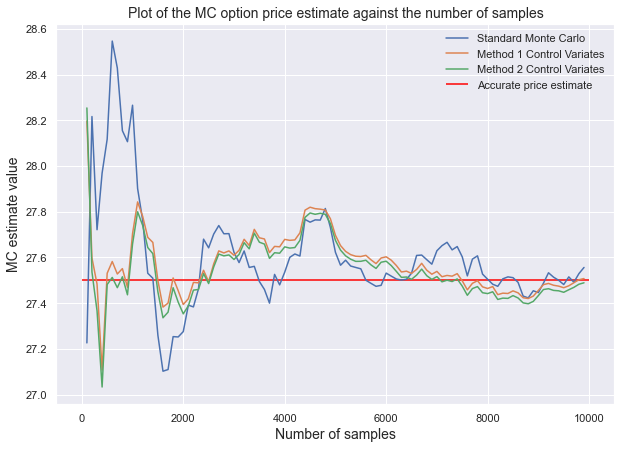

In [55]:
_ , ax = plt.subplots(figsize = (10,7))
ax.plot(np.arange(100, 10_000, 100) , p1, label = 'Standard Monte Carlo')
ax.plot(np.arange(100, 10_000, 100) , p2, label = 'Method 1 Control Variates')
ax.plot(np.arange(100, 10_000, 100) , p3, label = 'Method 2 Control Variates')
ax.hlines(27.50, xmin = 0, xmax = 10_000,  color='red' , label = 'Accurate price estimate');
ax.set_title('Plot of the MC option price estimates using different methods' , fontsize = 14);
plt.xlabel('Number of samples' , fontsize = 14)
plt.ylabel('MC estimate value', fontsize = 14)
ax.ticklabel_format(useOffset=False, style='plain')
ax.legend(frameon = False);

In the above graph, we use the relatively accurate estimate of 27.50 for the time-0 option price which we have calculated in part (c) as a benchmark for comparing the three methods. We observe that as expected, both control variates estimators are converging towards the 'true' time-0 price at a faster rate than the standard Monte Carlo estimator. This can also be seen by plotting the sample variances of the three estimators as seen below.

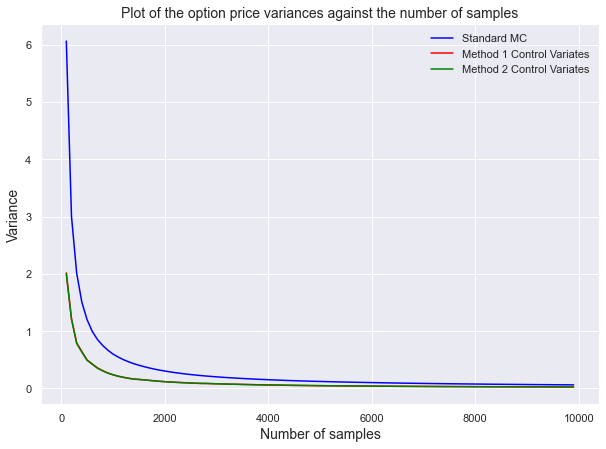

In [56]:
_ , ax = plt.subplots(figsize = (10,7))
ax.plot(np.arange(100, 10_000, 100) , v1, 'blue', label = 'Standard MC')
ax.plot(np.arange(100, 10_000, 100) , v2, 'red', label = 'Method 1 Control Variates')
ax.plot(np.arange(100, 10_000, 100) , v3, 'green', label = 'Method 2 Control Variates')
ax.set_title('Plot of the option price variances against the number of samples' , fontsize = 14);
plt.xlabel('Number of samples' , fontsize = 14)
plt.ylabel('Variance', fontsize = 14)
ax.legend(frameon = False);

In this graph, noting that the two control variate estimator variance curves coincide, we can conclude that both methods are of extremely similar effectiveness. Note also that the magnitude of the variance reduction of the two methods is particularly important when smaller sample sizes are considered (as seen in this graph).